# DataHacks2021 2021 - Team No Sleep
#### Team: Kenneth Nguyen, Ishaan Gupta, Richard Xu, Ethan Tran

## Introduction
For this project, our team was provided a dataset that contained information about the word counts for __8265 words__ across __8 religious texts__. We were tasked with cleaning the dataset and looking at different trends that may exist in the data. Using different Python libraries and statistical methods, we were able to observe some interesting trends in the data.

<!-- <img src='books.png' width=1500> -->

In [2]:
# imports
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.decomposition import PCA 
import scipy.stats as ss
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('AllBooks_baseline_DTM_Labelled.csv')

Currently, the first column is the book and chpater all other columns represent words.

In [4]:
df

,Unnamed: 0,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
0,Buddhism_Ch1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Buddhism_Ch2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Buddhism_Ch3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Buddhism_Ch4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Buddhism_Ch5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,BookOfWisdom_Ch15,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
586,BookOfWisdom_Ch16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,BookOfWisdom_Ch17,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
588,BookOfWisdom_Ch18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since distribution of words in each chapter of a book might not represent that of the book as whaole very well, we combine the word counts for each book across their chapters by taking the sum of word counts.

In [5]:
df.insert(0, 'book_',[book for book,_ in df[df.columns[0]].str.split('_',n=1)] )

In [6]:
books_df = df.groupby(['book_']).sum()
books = books_df.index

# Top 20 words

In [7]:
 def top_twenty_words (cleaned_df):
    data = {}
    easier_table = cleaned_df.transpose()
    book_names = easier_table.columns
    
    for book in book_names:
        data[book] = easier_table[book].sort_values(ascending = False).head(20)
        
    return data

In [8]:
books_top20=top_twenty_words(books_df)

In [9]:
books_top20

{'BookOfEccleasiasticus': shall     508
 thy       330
 man       232
 thou      230
 god       193
 hath      189
 thee      170
 lord      152
 things    120
 upon      115
 wisdom     97
 heart      96
 good       95
 men        82
 fear       81
 soul       80
 one        77
 shalt      76
 give       71
 glory      71
 Name: BookOfEccleasiasticus, dtype: int64,
 'BookOfEcclesiastes': shall     89
 man       71
 hath      46
 god       46
 things    46
 thy       43
 time      42
 sun       36
 also      31
 vanity    29
 heart     27
 thou      26
 wisdom    26
 evil      24
 good      22
 better    22
 wise      22
 men       22
 labour    19
 one       19
 Name: BookOfEcclesiastes, dtype: int64,
 'BookOfProverb': shall     389
 man       176
 thy       165
 thou       93
 wicked     92
 lord       85
 wise       71
 hath       65
 heart      64
 thee       59
 way        56
 evil       54
 wisdom     53
 mouth      51
 words      47
 son        47
 soul       47
 good       46
 

In [10]:
def top_twenty_words (cleaned_df):
    data = {}
    easier_table = cleaned_df.transpose()
    book_names = easier_table.columns
    
    fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(70,25))


    column = 0
    row = 0

    for book in book_names:
        data[book] = easier_table[book].sort_values(ascending = False).head(20)
        
        x = data[book]
        x = np.array(list(x.items())).T
        axs[row,column].tick_params('x',labelsize=20, rotation = 90)
        axs[row,column].tick_params('y',labelsize=15, direction='in')
        axs[row,column].bar(list(x[0])[::-1],list(x[1])[::-1])
        axs[row,column].set_title('Top 20 words in '+book, size = 25)
        if column == 3:
            row = 1
            column = -1
        
        column+=1 
    plt.savefig('8_plots.jpg')

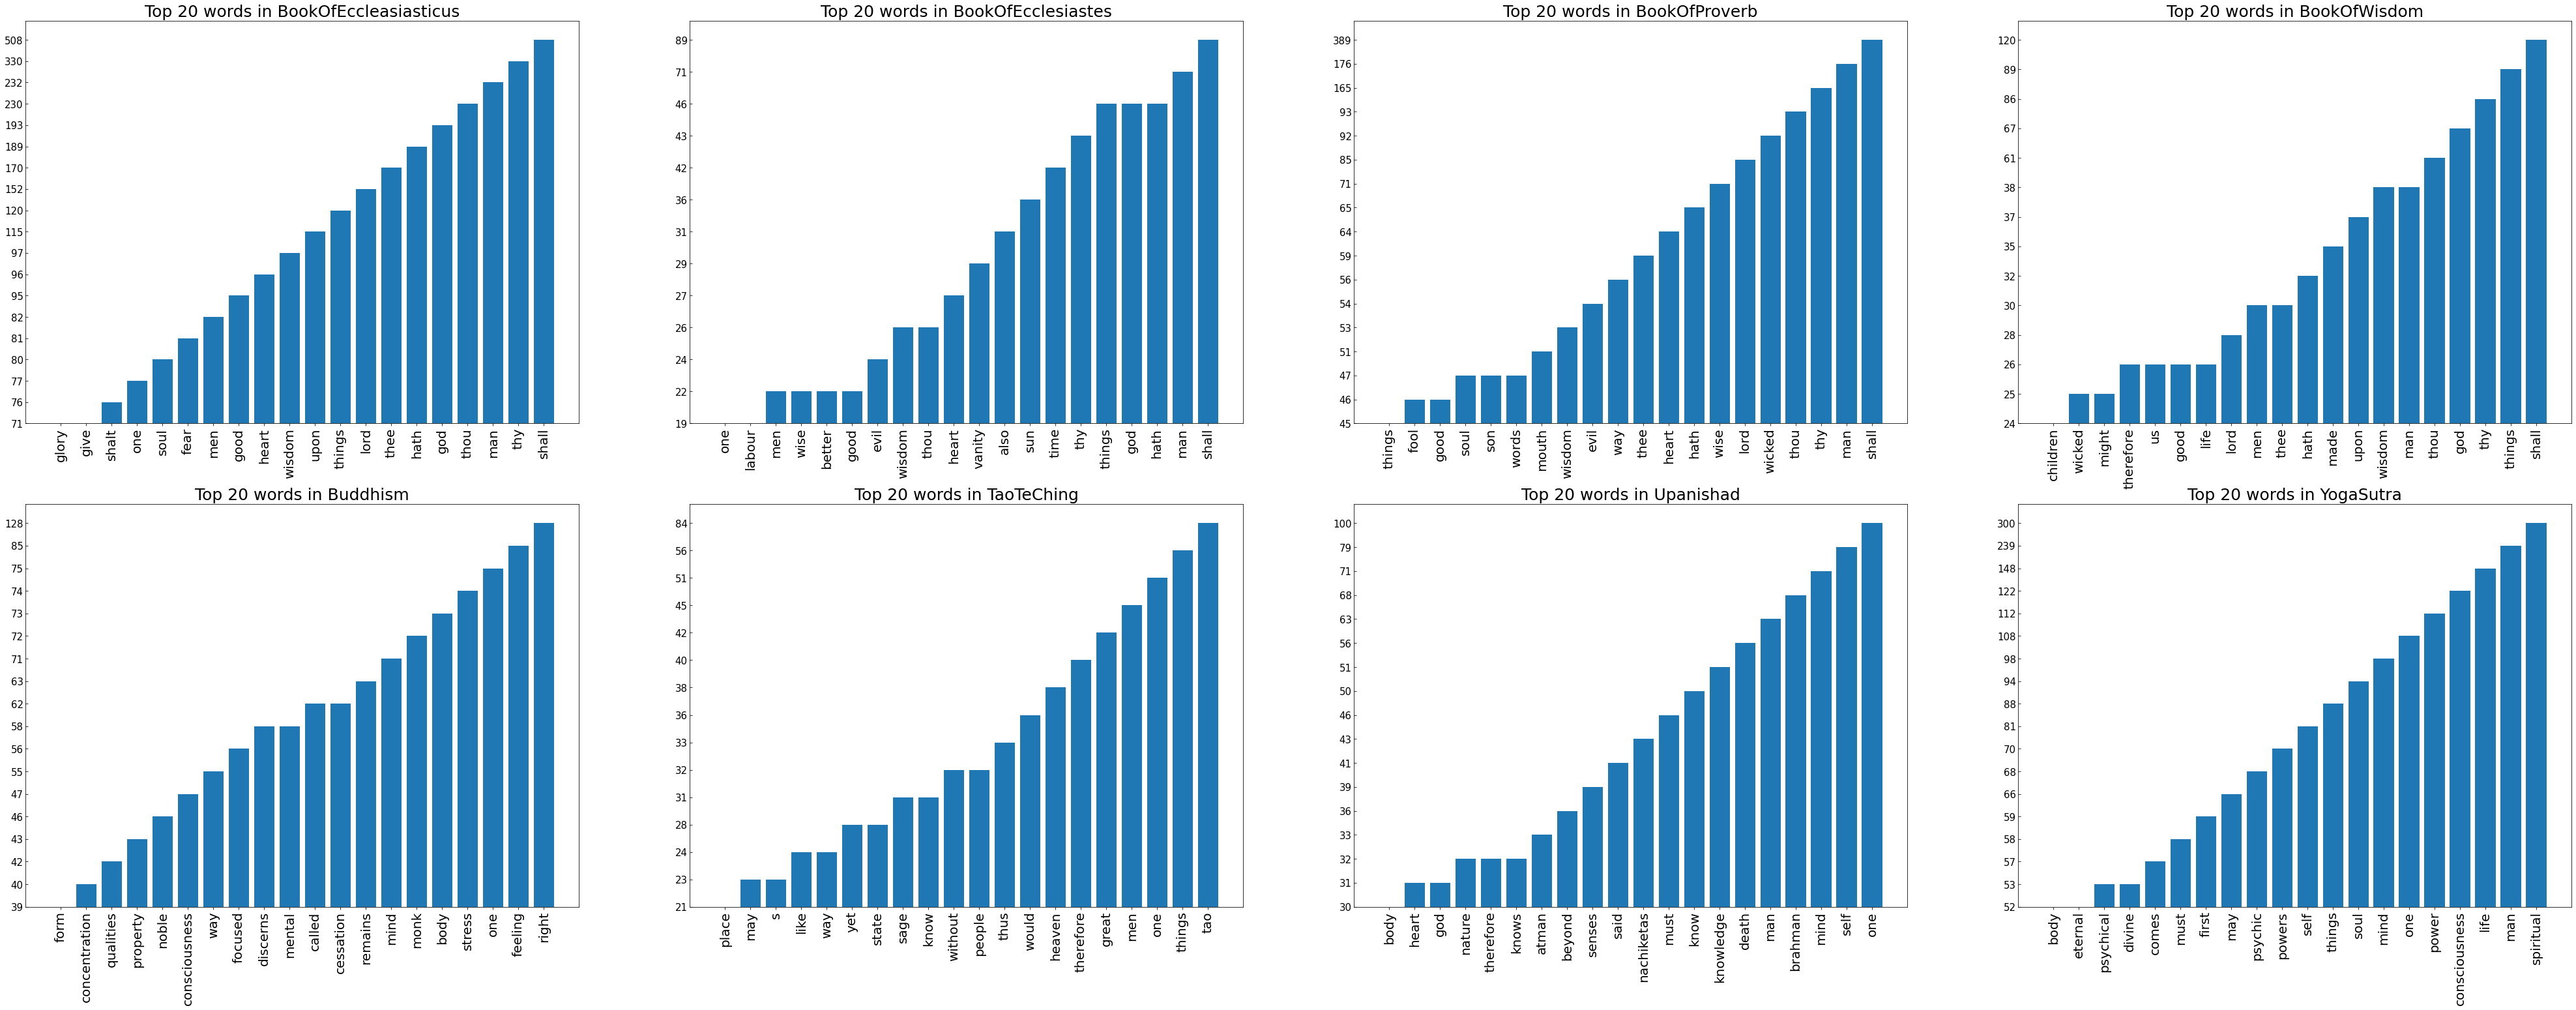

In [11]:
top_twenty_words(books_df)

##### Figure 1: These visualizations display the top 20 most commonly used words in each of the books individually
<br><br>

In [12]:
top_20_across_books = books_df.sum(axis = 0).sort_values(ascending = False).head(20)

Index of `top_20_across_books` shows the top 20 words across all books

In [13]:
top_20_across_books.index

Index(['shall', 'man', 'thy', 'one', 'things', 'thou', 'god', 'life', 'hath',
       'spiritual', 'lord', 'mind', 'thee', 'heart', 'soul', 'wisdom', 'men',
       'upon', 'good', 'way'],
      dtype='object')

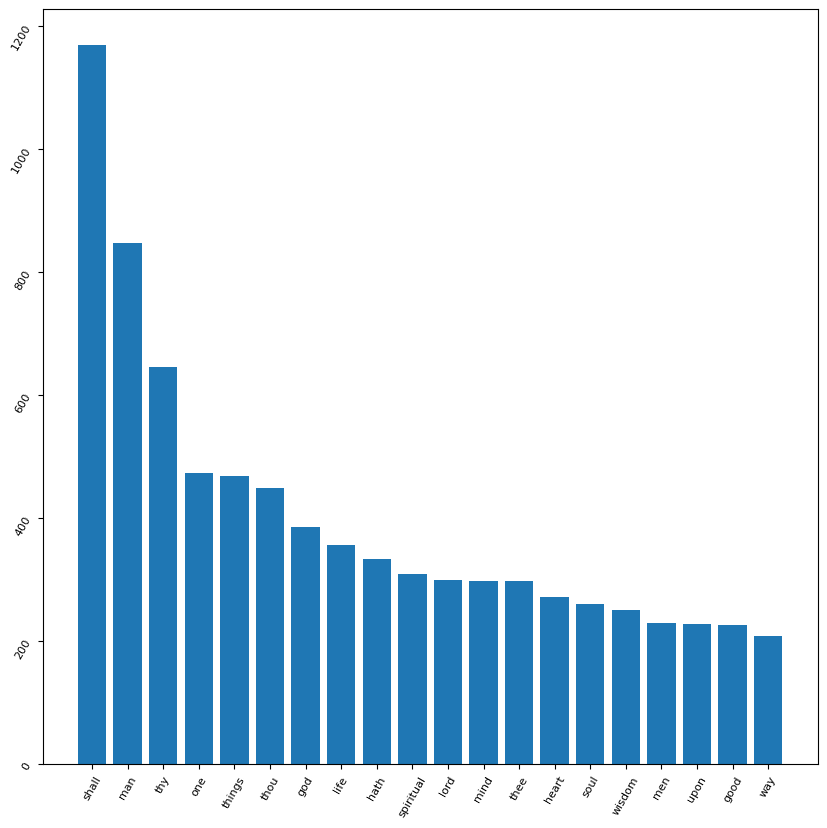

In [14]:
plt.figure(figsize=(10,10),dpi=100)
plt.xticks(size=8,rotation = 60)
plt.yticks(size=8, rotation = 60)
plt.bar(top_20_across_books.index,top_20_across_books.values)
plt.savefig('allbooksTop20.jpg')

##### Figure 2: Top 20 words across all the books

Looking at Figure 1 and Figure 2, an interesting trend to notice is that from the texts that come from the Abrahamic religions (Book of Ecclesiasticus, Book of Ecclesiastes, Book of Proverb, Book Of Wisdom) all have the word __“shall”__ as their most used word. This may indicate that these books are focused more on making commandments and advising the reader on what to do as the word “shall” expresses a certain type of desire. Looking at the texts from the Eastern religions, (Upanishad, YogaSutra, Buddhism, and TaoTeChing), a very commonly used word between these books are the words “one” and “man”/“body”. This may indicate that these texts are more interested in the idea of how a person and the world are connected as one entity as opposed to the idea that they are separate. 
This is true for the top three words in this figure, man and thy are the most prevalent in the four aforementioned books.

## TF-IDF calculations for each word in each book. 
TF-IDF is the product of the frequency of a word in a document relative to all words in the document and the frequency of word occuring across all documents. This entails how important a word is, in terms of frequency, in a document, scaled to all words in all documents. We further use this metric using Dimensionality Reduction algorithm UMAP to plot them and visually observe the distances of the books relative to each other.

In [15]:
books_df

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
book_,,,,,,,,,,,,,,,,,,,,,
BookOfEccleasiasticus,0,189,3,1,0,14,0,0,3,0,...,0,0,0,1,1,0,7,0,2,0
BookOfEcclesiastes,0,46,0,0,0,5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
BookOfProverb,2,65,0,0,0,11,0,0,0,0,...,0,0,0,0,0,0,8,0,1,0
BookOfWisdom,0,32,0,0,0,1,0,0,0,1,...,2,0,0,0,0,0,7,0,0,0
Buddhism,0,0,0,0,19,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,0
TaoTeChing,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Upanishad,0,0,0,0,0,3,1,0,1,0,...,0,3,0,0,0,0,2,1,0,1
YogaSutra,0,2,1,0,0,0,0,1,0,0,...,0,0,2,0,0,1,14,4,0,1


In [16]:
tf = pd.DataFrame({book: books_df.loc[book]/books_df.loc[book].sum() for book in books})
IDF = books_df.sum(axis=0)
IDF = IDF+1 #account for divsion by 0 error

IDF = len(books_df)/IDF

TF_IDF = pd.DataFrame({book: tf[book] * (1/IDF) for book in books}).transpose()

TF_IDF

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
BookOfEccleasiasticus,0.000000,0.533350,0.000126,0.000017,0.000000,0.004246,0.000000,0.00000,0.000126,0.00000,...,0.000000,0.000000,0.00000,0.000017,0.000017,0.00000,0.002830,0.000000,0.000067,0.000000
BookOfEcclesiastes,0.000000,0.694645,0.000000,0.000000,0.000000,0.008114,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000225,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
BookOfProverb,0.000097,0.352757,0.000000,0.000000,0.000000,0.006415,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.006221,0.000000,0.000065,0.000000
BookOfWisdom,0.000000,0.266561,0.000000,0.000000,0.000000,0.000895,0.000000,0.00000,0.000000,0.00005,...,0.000149,0.000000,0.00000,0.000000,0.000000,0.00000,0.008355,0.000000,0.000000,0.000000
Buddhism,0.000000,0.000000,0.000000,0.000000,0.007171,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.008152,0.000000,0.000000,0.000000
TaoTeChing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000977,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Upanishad,0.000000,0.000000,0.000000,0.000000,0.000000,0.002052,0.000038,0.00000,0.000095,0.00000,...,0.000000,0.000285,0.00000,0.000000,0.000000,0.00000,0.001824,0.000114,0.000000,0.000057
YogaSutra,0.000000,0.006731,0.000050,0.000000,0.000000,0.000000,0.000000,0.00002,0.000000,0.00000,...,0.000000,0.000000,0.00006,0.000000,0.000000,0.00002,0.006751,0.000241,0.000000,0.000030


# UMAP Ananlysis

In [17]:
reducer = umap.UMAP()
# embedding = reducer.fit_transform(books_df)
embedding = reducer.fit_transform(TF_IDF)

/Users/ishaangupta/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1674: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


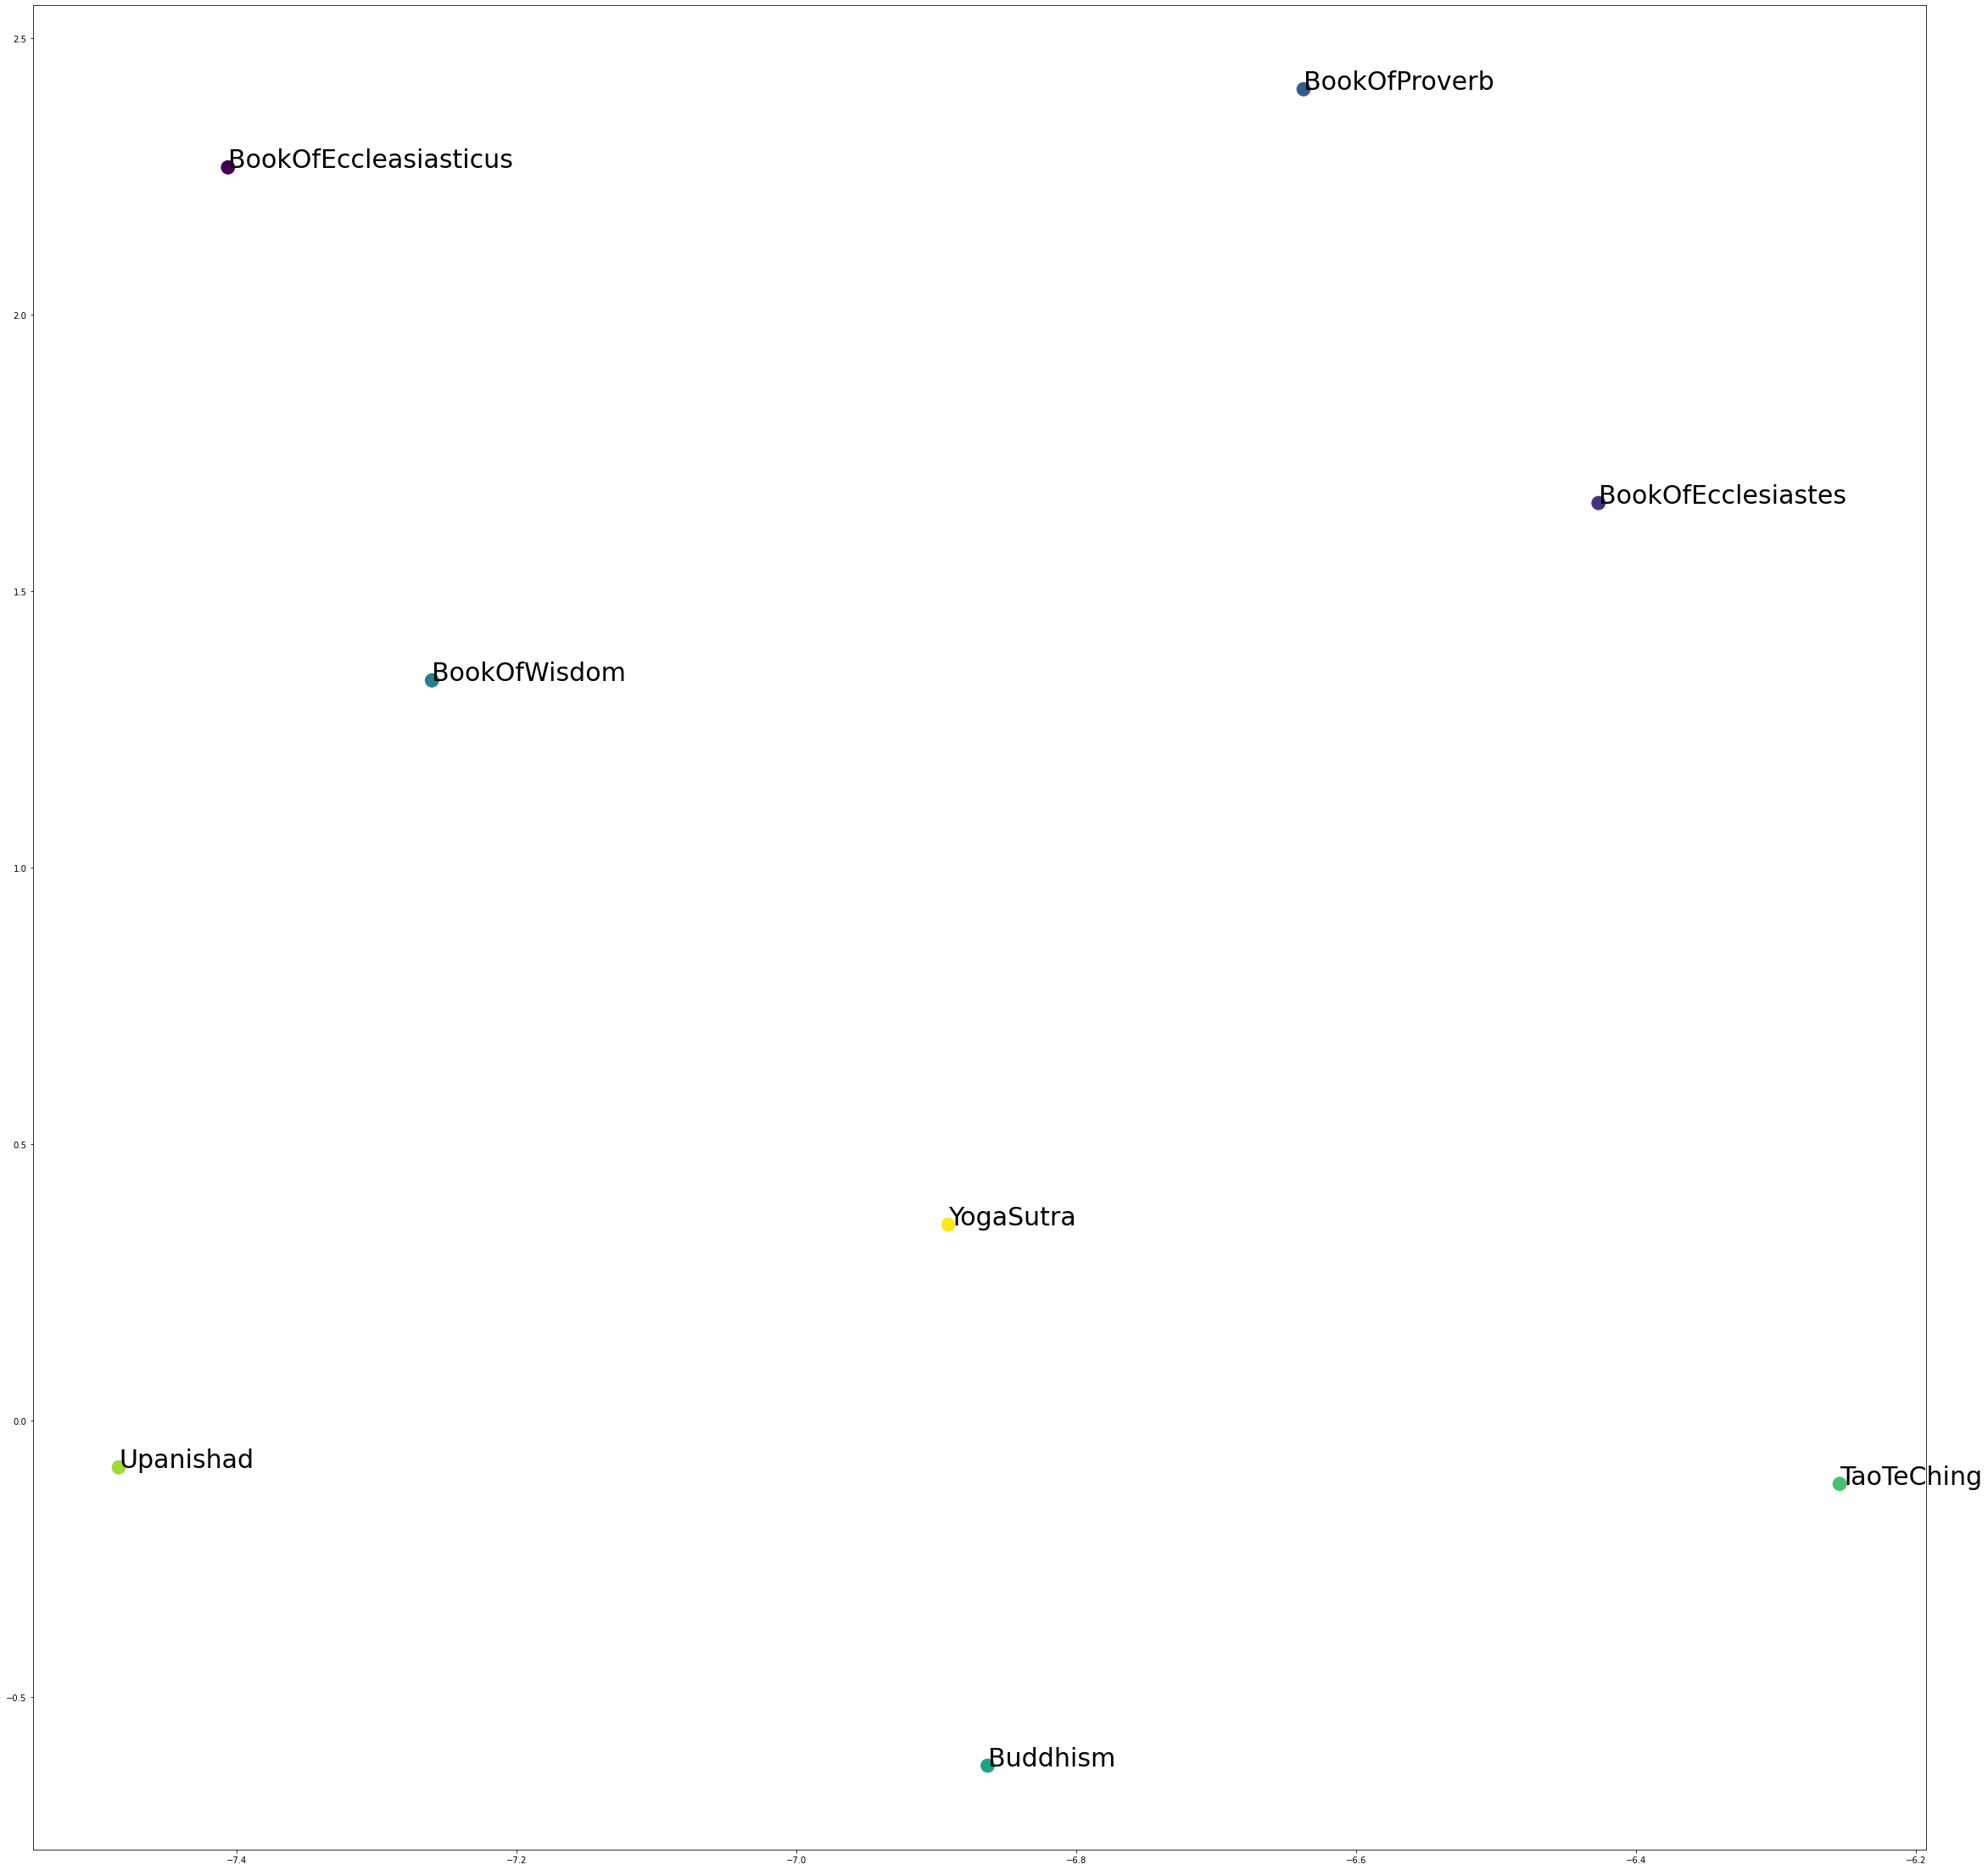

In [18]:
fig,ax = plt.subplots(figsize=(40,40))
# plt.figure(figsize=(50,50),dpi=40)
ax.scatter(
    embedding[:, 0],
    embedding[:, 1],c=np.arange(8), s= 250)
for i in np.arange(8):
    ax.annotate(books[i],(embedding[i, 0],embedding[i, 1]), fontsize =30, in_layout = True)
plt.savefig('UMAP_for_all_books.jpg')

##### Figure 3(a): UMAP analysis shows that Buddhism and Taoism are very close to each other compared to other texts; Yoga Sutra and Upanishad also form a relatively close pair

In [28]:
reducer = umap.UMAP()
chapter_embedding = reducer.fit_transform(df[df.columns[2:]])

We also attempt to get UMAP for chapterwise word counts.

In [34]:
book_map = {y:x for x,y in list(enumerate(books))}

book_map

{'BookOfEccleasiasticus': 0,
 'BookOfEcclesiastes': 1,
 'BookOfProverb': 2,
 'BookOfWisdom': 3,
 'Buddhism': 4,
 'TaoTeChing': 5,
 'Upanishad': 6,
 'YogaSutra': 7}

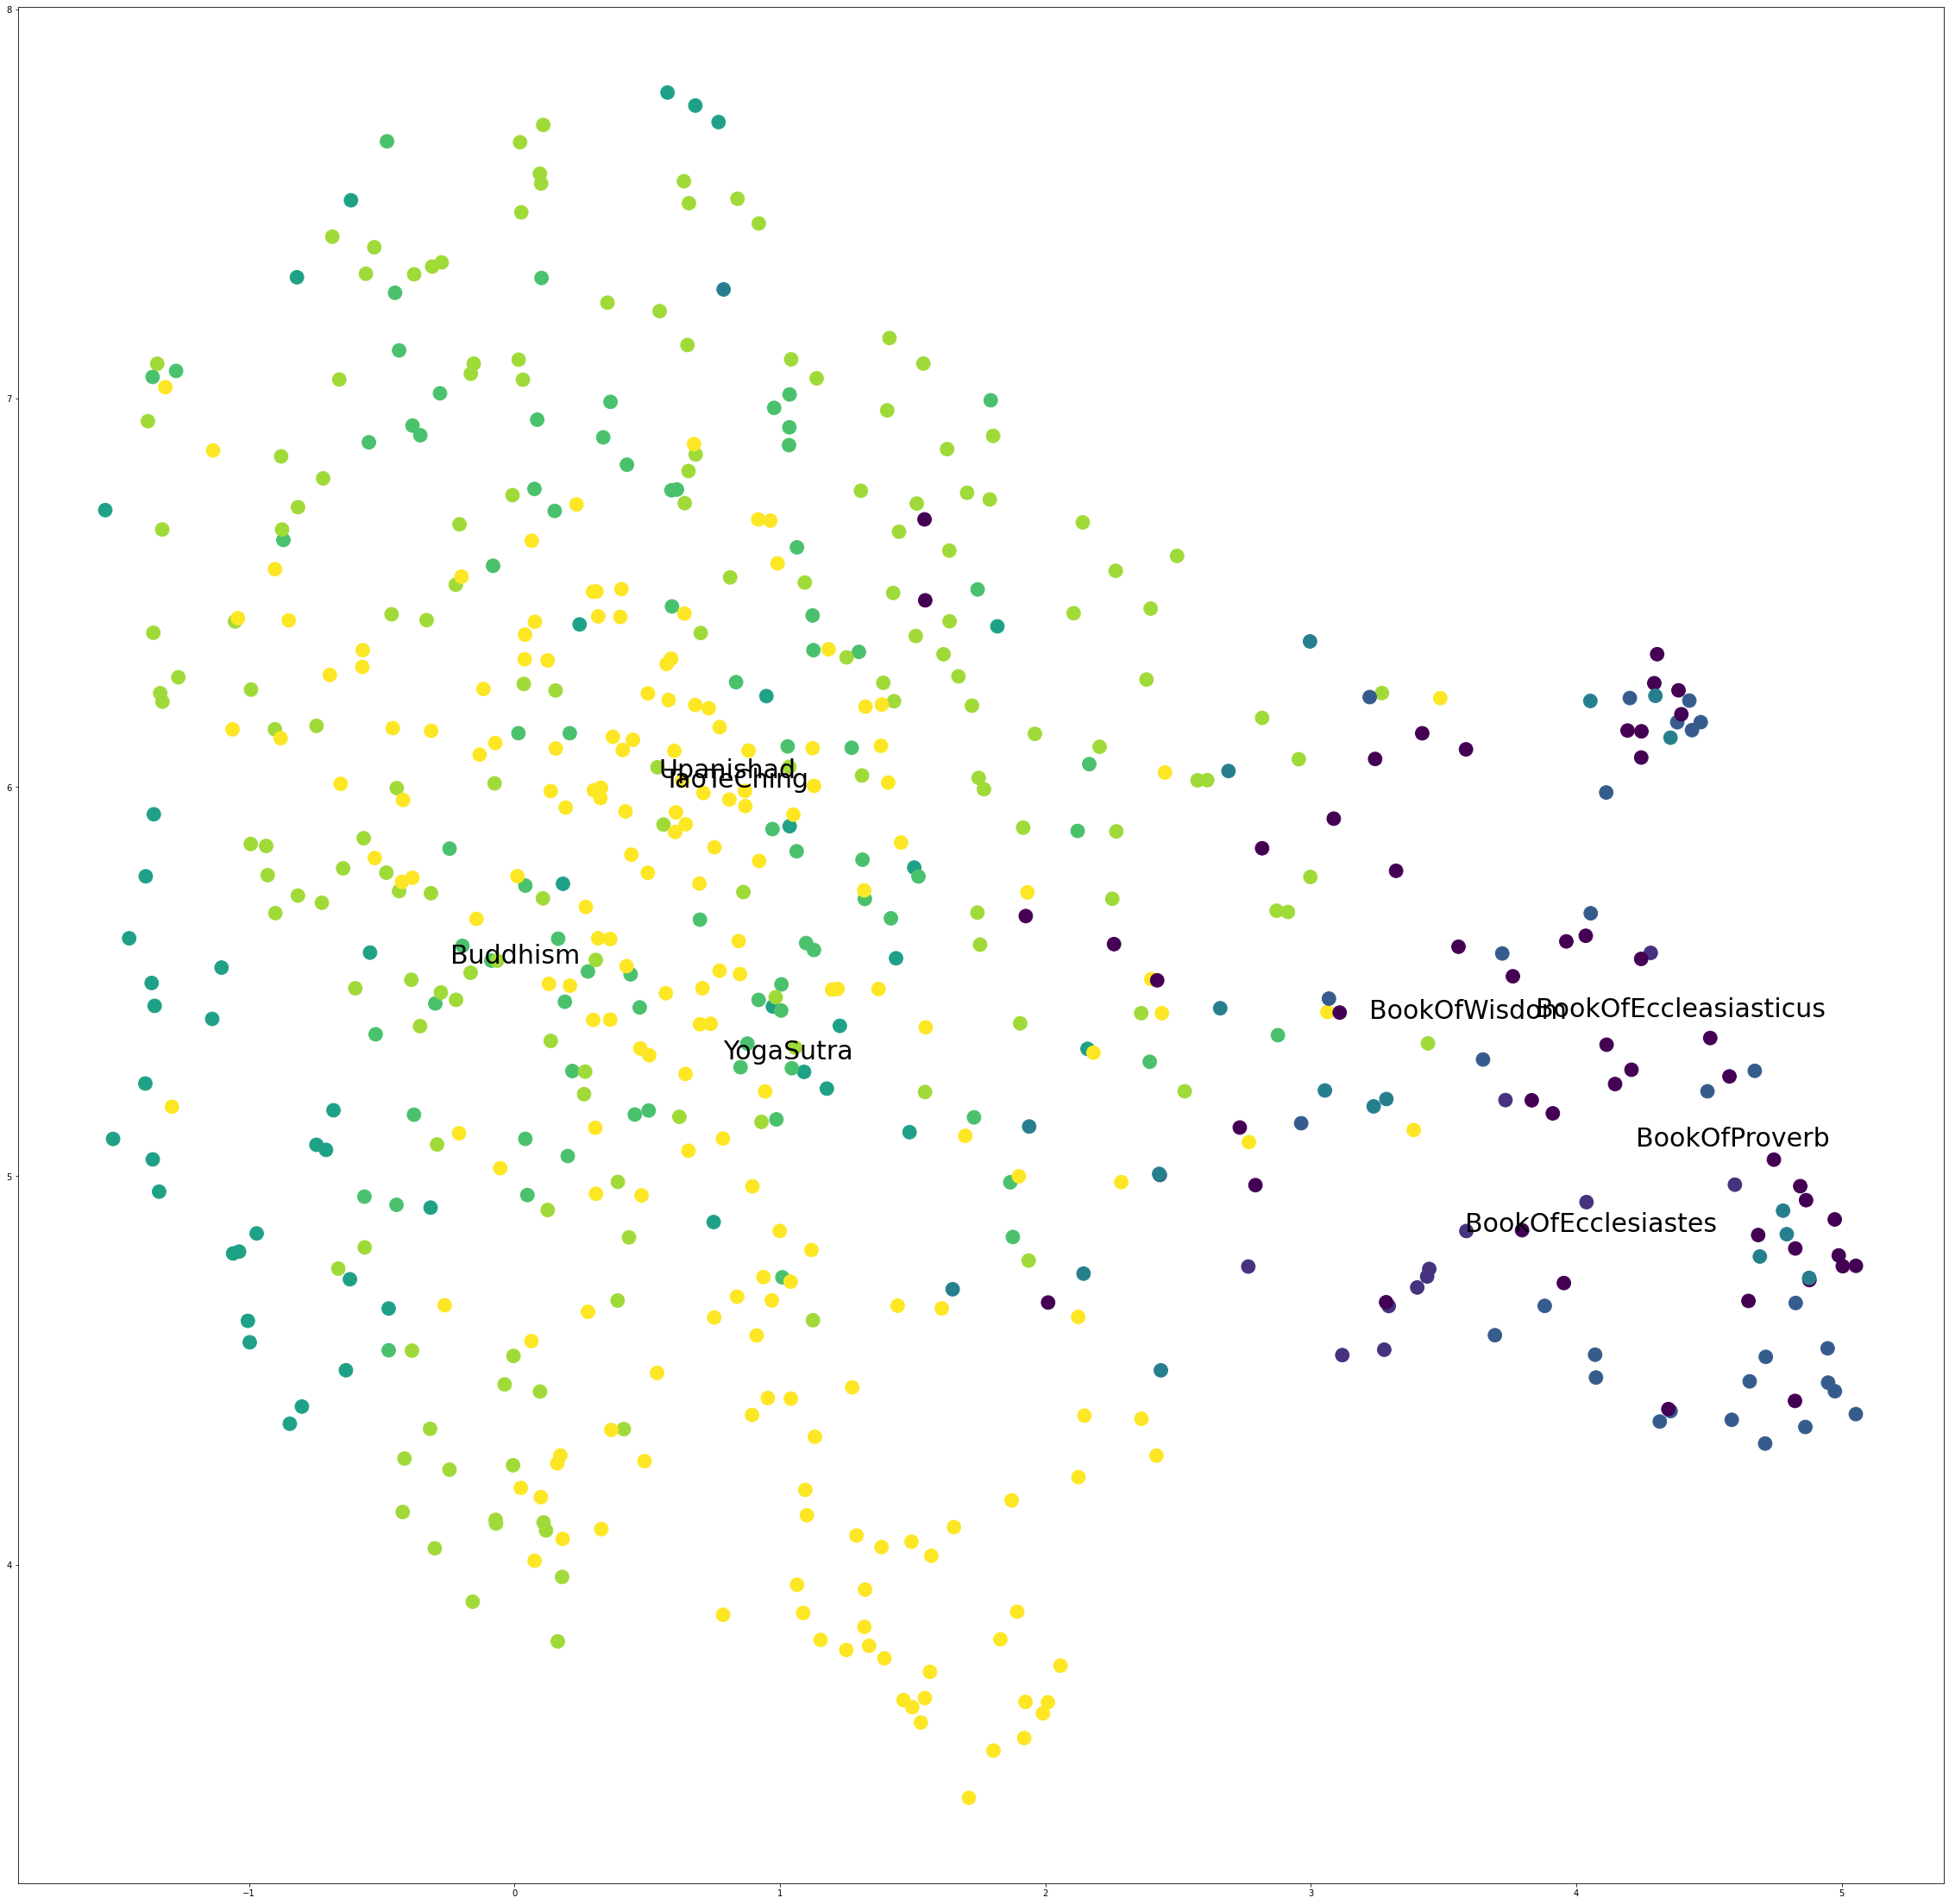

In [54]:
fig,ax = plt.subplots(figsize=(40,40))
# plt.figure(figsize=(50,50),dpi=40)
ax.scatter(
    chapter_embedding[:, 0],
    chapter_embedding[:, 1],c= [book_map[x] for x in df[df.columns[0]]], s= 250)
for book in books:
    i = df[df[df.columns[0]] == book].index
    centroid = np.mean(chapter_embedding[ df[df[df.columns[0]] == book].index], axis = 0)
    ax.annotate(book,centroid, fontsize =30, in_layout = True)
plt.savefig('UMAP_for_all_books.jpg')

##### Figure 3(b): UMAP analysis of chapterwise word counts, each color showing a different book.

The data points seem to converge a lot for many books, indicating that chapters are not good sample points representing word count distribution for corresponding book, and so we will not refer to the chapterwise word counts in our analysis but instead use just the combined book-wise word counts.

# A Closer Look at Buddhism and Taoism
In our UMAP analysis, Buddhism and Taoism form a distuingishably close pair. 
We shall use first k-means clustering, and then Hierarchical clustering to see exactly which two texts are the most similar and distinguishable from the rest of the texts. So we generate 7 clusters among the 8 texts, the ony cluster containing a pair would be highly similar and distinguishable.

Our hypothesis is that Buddhism and Taoism are similar enough to be that pair that appear in the same cluster.

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0).fit_predict(TF_IDF)

All we need is the 0th cluster (`first_cluster`) for our purpose and we further plot which texts appear in the 0th cluster (`first_cluster`)

In [20]:
first_cluster = kmeans==0

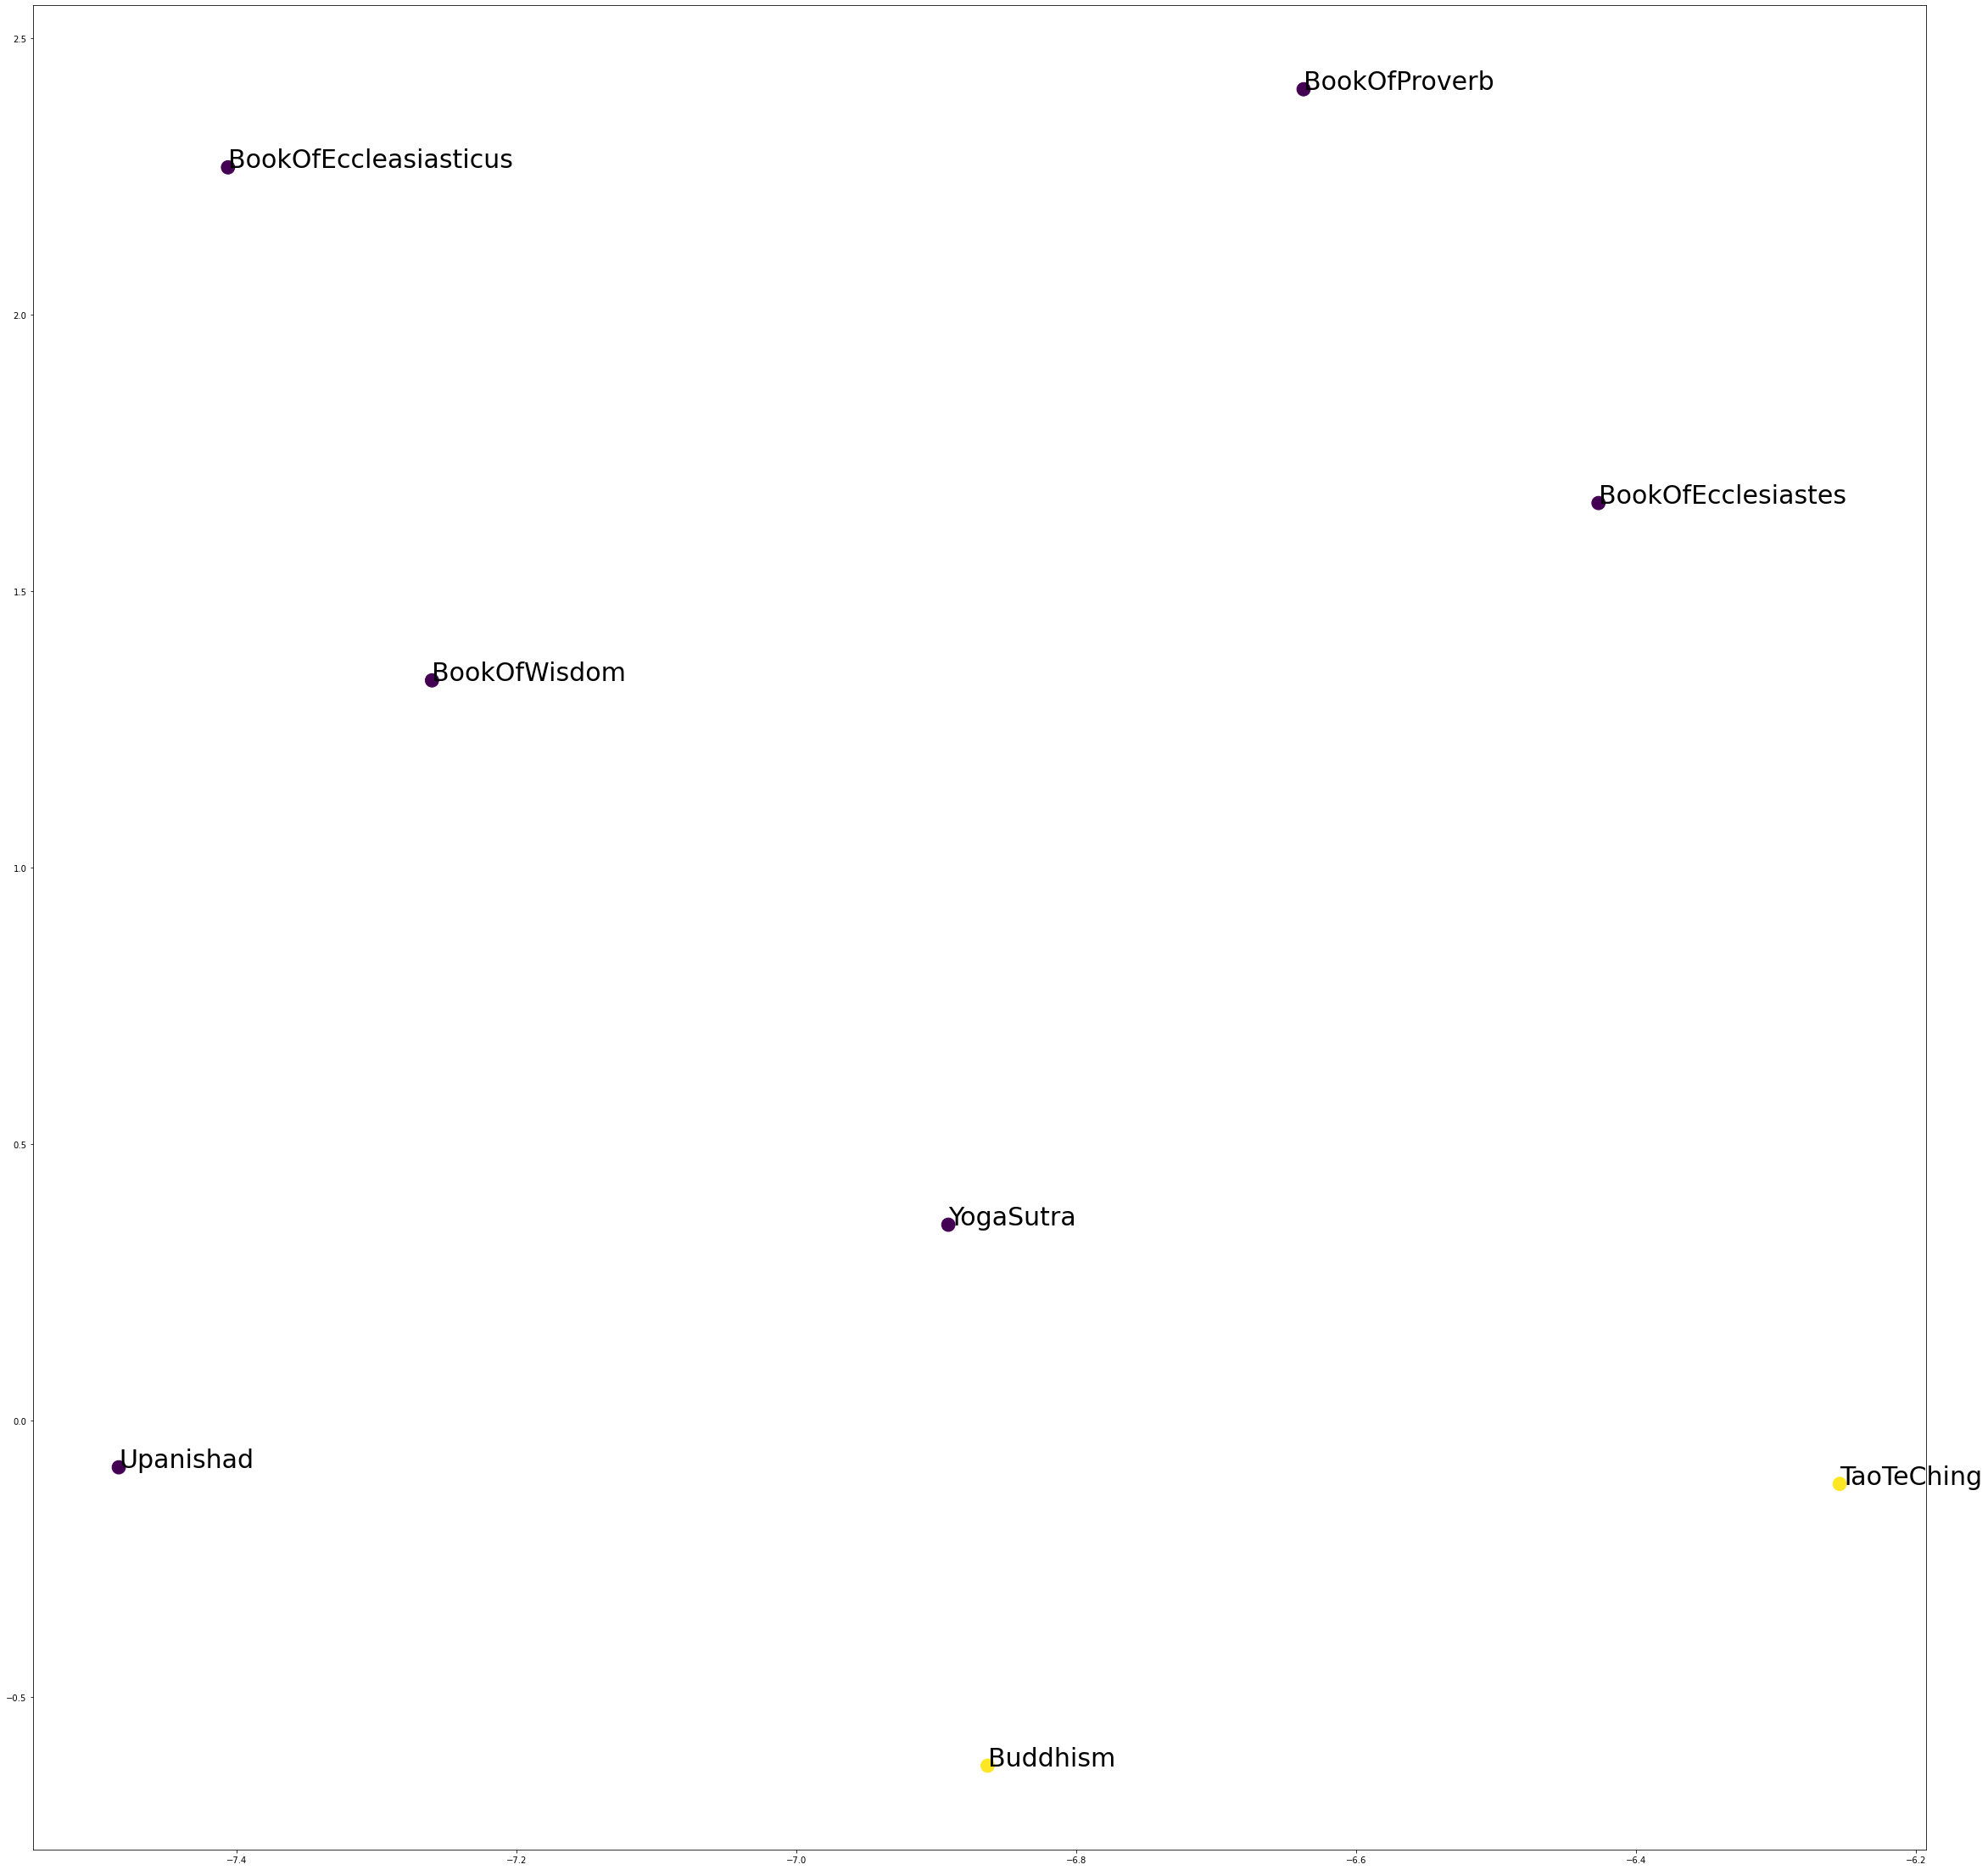

In [21]:
fig,ax = plt.subplots(figsize=(40,40))
# plt.figure(figsize=(50,50),dpi=40)
ax.scatter(
    embedding[:, 0],
    embedding[:, 1],c=first_cluster, s= 250)
for i in np.arange(8):
    ax.annotate(books[i],(embedding[i, 0],embedding[i, 1]), fontsize =30, in_layout = True)
plt.savefig('UMAP_for_all_books.jpg')

##### Figure 4: Yellow dots indicate texts belonging to the first cluster, Purple dots indicate texts not belonging to the first cluster. So upon making 7 clusters using kmeans, Buddhism and Taoism texts come out to be the members of the first cluster, the only cluster containing a pair.

We also use Hierachical clustering to more clearly visulize the closest pair from all the text based on TF-IDF metric, which will appear in the form of the pair that has the last split

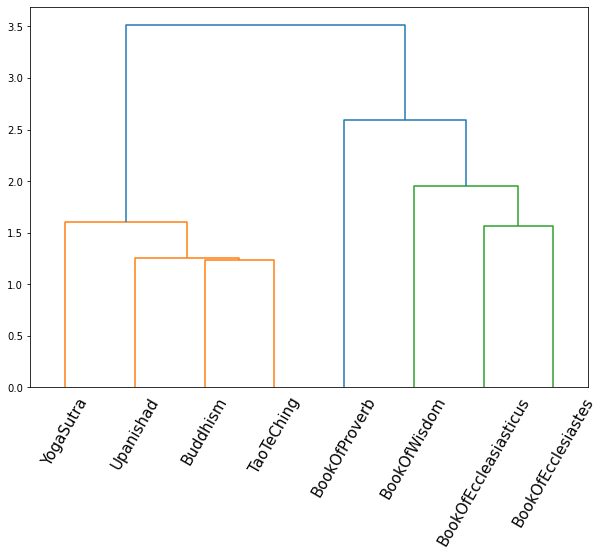

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = TF_IDF
linked = linkage(X, 'single')

labelList = books
# labelList = range(8)
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.tick_params('x',labelsize=15, rotation = 60)
plt.show()

##### Figure 5: Hierarchical clustering of all the texts based on TF-IDF. Buddhism and Tao Te Ching form the pair that splits last, indicating the pair closest to each other

The first cluster appears to contain __Buddhism__ and __Tao TeChing__, essentially leading us to conclude that Buddhism and Taoism have a very strong relationship based on this data, compared to the other texts. Our hypothesis proved to be correct, now we shall discuss the backgroundbehind this connection. Despite the fact that Buddhism and Taoism are similar enough in their texts to be clustered together, it cannot be said that these similar word usages can be applied to their practices because of the fundamental differences between the two religions. Hence, we use external source for examining practices and beliefs, and connect them to word usages.

### Background on relationship between Buddhism and Taoism
Buddhists believe in reincarnation, focusing to eliminate mental suffering. Buddhists believe that life is suffering. [4]
Because of this, it makes sense that the Buddhism text has "right" as its most frequent word (Figure 1) because according to the Buddhists, living life according to certain "right" actions will help prevent suffering and lead to Nirvana

Taoism believe in the present, rather than post-death. They also make it their goal to gain balance in life. Taoist look at life positively and can be improved by following Tao/Way of Nature. [5]
"Tao" being the most common word for the TaoTeChing text makes sense as well because the idea behind Taoism is following the Tao to find harmony.

Buddhism & Taoism Similarities:

Buddhism & Taoism are both considered very peaceful religion. They focus on mediation for the sake of peace of mind & enlightenment. 

Furthermore,  although their idea of self improvement differs due to more focus on the afterlife in Buddhism than the present in Taoism. there is a common goal underlying the differences in their approach - they both focus on the idea of self-improvement. [6]
TaoTeChing (Taoism): "presented a way of life intended to restore harmony and tranquillity"

### Hierarchical Clustering analysis
Evolution of these texts can be visualized in terms of a dendogram which uses our word count data to find distances between the texts. We shall particularly focus on the texts `BookOfEcclesiastes`, `BookOfProverb` and `BookOfWisdom`, since they are a part of The Old Testament. 

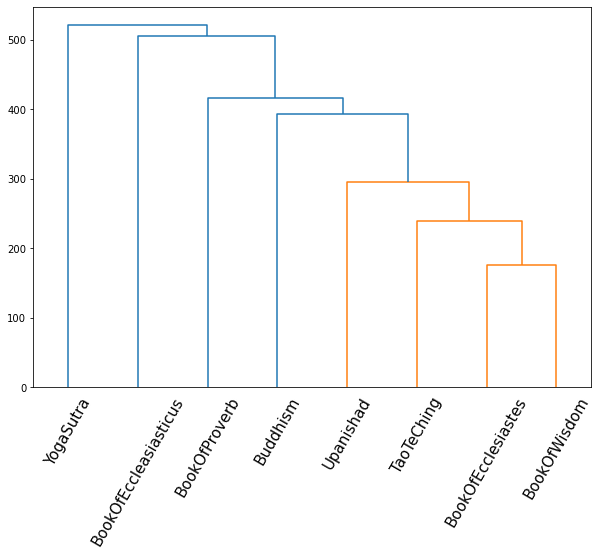

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = books_df
linked = linkage(X, 'single')

labelList = books
# labelList = range(8)
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.tick_params('x',labelsize=15, rotation = 60)
plt.show()

##### Figure 6: The dendogram for word counts for all the texts. 
<br><br>
In the dendogram for all the texts, based on word counts (Figure 5), we observe Book of Proverb diverges much earlier (in terms of number of splits) compared to Book of Ecclesiastes and Book of Wisdom. This observation can be interpreted as the Book of Proverb being very different from Book of Ecclesiastes and Book of Wisdom. Since they are all part of The Old Testament, we could infer that the main reason behind Book of Proverb being in a distant cluster is chronological influence. We used external sources to confirm this deduction and much to our delight, while Book of Proverb 700 BCE[1], the other two texts evolved much later - Book of wisdom 1st century BCE[2], and Book of Ecclesiastes 3rd century BCE[3]

Similarly referring back to Figure 5 showing the dendogram generated by TF-IDF metric, we can see that the Book of Wisdom, Book of Ecclesiastes, and the Book of Proverbs are clustered together when we split into 2 clusters, which makes sense because they are all part of the Old Testament in the Bible. However, we can see that the Book of Proverb is in a separate cluster from the Book of Wisdom and Ecclesiastes when split into 3 clusters most prbably because it was written much earlier than the other two books.

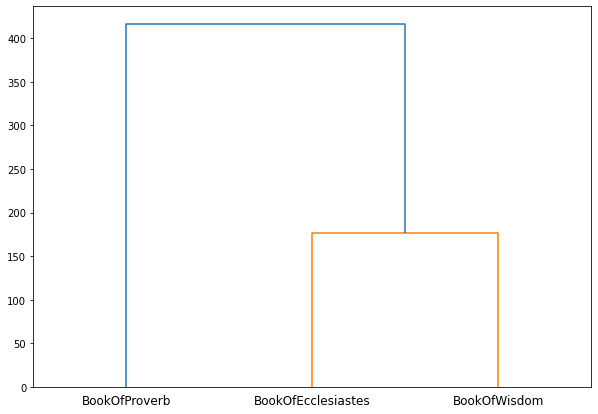

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = books_df.iloc[1:4,:]
linked = linkage(X, 'single')

labelList = books[1:4]
# labelList = range(1,4)
plt.figure(figsize=(10, 7))
plt.tick_params('x',labelsize=25, rotation = 60)
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Running hierarchical clustering for just the 3 books gives exactly similar results.

In [25]:
metric = books_df

top = 20
words = metric.columns
proverb_values = np.array(metric.iloc[2])/metric.iloc[2].sum()
ecc_values = np.array(metric.iloc[1])/metric.iloc[1].sum()
wisdom_values = np.array(metric.iloc[3])

# Highly used in Proverb than Ecc
# sorted(enumerate(list(proverb_values - ecc_values)),key= lambda x: x[1])
top_100_ecc_less = sorted(enumerate(list(proverb_values - ecc_values)),key= lambda x: x[1], reverse=True)[:100]
top_100_wisdom_less = sorted(enumerate(list(proverb_values - wisdom_values)),key= lambda x: x[1], reverse=True)[:100]

print("Top 10 words less frequent in Ecclesiastes than Proverbs ",'\n',[words[x[0]] for x in top_100_ecc_less[:10]])
print()
print("Top 10 words less frequent in Wisdom than Proverbs",'\n',[words[x[0]] for x in top_100_wisdom_less[:10]])
print()

proverbs_more = set([words[x[0]] for x in top_100_ecc_less]).intersection(set([words[x[0]] for x in top_100_wisdom_less]))

print("Words less frequent in both Ecclesiastes and Wisdom than Proverbs",'\n',proverbs_more)
print()



print()


top_10_ecc_more = sorted(enumerate(list( ecc_values - proverb_values )),key= lambda x: x[1], reverse=True)[:10]
top_10_wisdom_more = sorted(enumerate(list( wisdom_values - proverb_values )),key= lambda x: x[1], reverse=True)[:10]

print("Top 10 words more frequent in Proverbs than Ecclesiastes",'\n',[words[x[0]] for x in top_10_ecc_more[:10]])
print()
print("Top 10 words more frequent in Wisdom than Proverbs",'\n',[words[x[0]] for x in top_10_wisdom_more[:10]])
print()

proverbs_less = set([words[x[0]] for x in sorted(enumerate(list(ecc_values - proverb_values)),key= lambda x: x[1], reverse=True)[:100]]).intersection(set([words[x[0]] for x in sorted(enumerate(list(wisdom_values - proverb_values)),key= lambda x: x[1], reverse=True)[:100]]))

print("Words more frequent in both Ecclesiastes and Wisdom than Proverbs",'\n',proverbs_less)



Top 10 words less frequent in Ecclesiastes than Proverbs  
 ['shall', 'lord', 'wicked', 'way', 'thy', 'thee', 'mouth', 'son', 'lips', 'instruction']

Top 10 words less frequent in Wisdom than Proverbs 
 ['shalt', 'woman', 'keepeth', 'rich', 'lying', 'paths', 'open', 'steps', 'seeketh', 'slothful']

Words less frequent in both Ecclesiastes and Wisdom than Proverbs 
 {'seeketh', 'saith', 'prudent', 'trusteth', 'lamp', 'ruin', 'open', 'hate', 'slothful', 'forsake', 'paths', 'followeth', 'woman', 'keepeth', 'rod', 'rich', 'stranger', 'lying', 'shalt', 'neighbour', 'uttereth', 'quarrels', 'hateth', 'sluggard', 'ones', 'steps'}


Top 10 words more frequent in Proverbs than Ecclesiastes 
 ['time', 'god', 'sun', 'things', 'vanity', 'also', 'hath', 'labour', 'better', 'know']

Top 10 words more frequent in Wisdom than Proverbs 
 ['shall', 'things', 'thy', 'god', 'thou', 'wisdom', 'man', 'upon', 'made', 'hath']

Words more frequent in both Ecclesiastes and Wisdom than Proverbs 
 {'end', 'also', 

Furthermore, referring to Figure 2, we notice some words with negative connotations - like 'wicked' and 'evil' - have siginificantly decreased in frequency in both Book of Wisdom and Ecclesiastes than the older Book of Proverbs. In fact, when we look at words that appear in both Top 100 words less frequent in Ecclesiastes than Proverbs and Top 100 words less frequent in Wisdom than Proverbs (output above), we see negative words like 'hate', 'lying', 'slothful', 'quarrels', and also 'rich' (because it shows materialiasm), while in words that appear in both Top 100 words less frequent in Ecclesiastes than Proverbs and Top 100 words less frequent in Wisdom than Proverbs (output above), we see more positive words like 'wisdom','good', 'great', 'god', 'know', and 'living'.

Besides, words less frequent in both Ecclesiastes and Wisdom than Proverbs are often '-eth' ending words - 'trusteth', 'keepeth', 'saith', 'hateth', 'seeketh', 'followeth', 'uttereth' - which might have become anachronic after 3rd century, which is when the later books Ecclesiastes and Wisdom eveolved. Whereas, none of the words more frequent in both Ecclesiastes and Wisdom than Proverbs end with '-eth'. This further bolsters chronological changes being the main reason driving the differences from Book of Proverbs.

## Conclusion:
After the analysis performed on the data set above, the results show that the wording between the books of Proverbs, Ecclesiastes, and Wisdom has changed as the Book of Proverbs was in a different cluster than the Books of Ecclesiastes and Wisdom. Since the three books come from The Old Testament, difference in beliefs and culture is probably not as impactful in this scenario. This is most likely due to a chronological influence as the Book of Proverb was written much earlier than the other two books. And then we confirmed this deduction through external sources. In regards to the similarities between Buddhism and Taoism, the UMAP and dendogram based on TF-IDF calculations shows that both religions are highly similar to one another based on their word usages. However, using the context of the religions, this similarity cannot be extended into the practices of these religions as the religions are too fundamentally different from one another.

### Sources:
1. https://www.britannica.com/topic/The-Proverbs
2. https://www.britannica.com/topic/Ecclesiastes-Old-Testament
3. https://www.britannica.com/topic/Wisdom-of-Solomon
4. https://taoism.net/tao/
5. http://www.pbs.org/edens/thailand/buddhism.htm
6. https://www.diffen.com/difference/Buddhism_vs_Taoism